# EDA on iris dataset
**Objective**: classify a new flower as belonging to one of the 3 classes given the 4 features

## 1. Import the necessary libraries

In [22]:
import pandas as pd 
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = load_iris()

In [3]:
df = pd.DataFrame(data = iris.data, columns = iris.feature_names)

In [4]:
df['target'] = iris.target

In [5]:
df.shape

(150, 5)

In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
# how many data points for each class are present?
df.target.value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

Iris dataset is balanced dataset since every class has same number of data points

## 2-D scatter plot

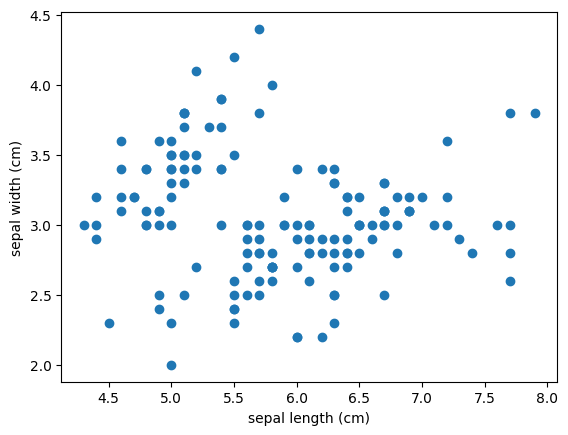

In [12]:
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'])
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.show()

### to plot this into three distinct colors, since we are not able to distinguish classes

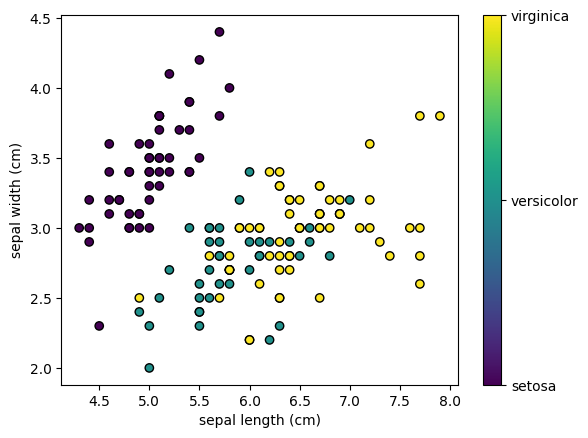

In [20]:
plot = plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c = df.target ,cmap= 'viridis', edgecolors = 'k')
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
colorbar = plt.colorbar(plot)
colorbar.set_ticks(np.unique(df.target))
colorbar.set_ticklabels(['setosa', 'versicolor', 'virginica'])
plt.show()

## 3-D ccatter plot
https://plotly.com/python/3d-scatter-plots/

## Pair plot
`sns.pairplot(df, hue='target', palette='deep')`:

* pairplot: This function in Seaborn creates a matrix of scatter plots for each pair of numerical columns in the DataFrame. It's useful for visualizing the relationships between different variables. In this case $^4C_2 = 6$ pairs.

* `df`: This is your DataFrame that contains the data you want to visualize.

* `hue='target'`: This parameter is used to add a categorical variable that will color-code the different groups in the pair plot. In this case, 'target' is the column in your DataFrame that you want to use for color-coding.

* `palette='deep'`: This parameter specifies the color palette to use for the different levels of the 'target' variable. 'deep' is one of the built-in palettes in Seaborn that provides a range of colors for better visual differentiation.

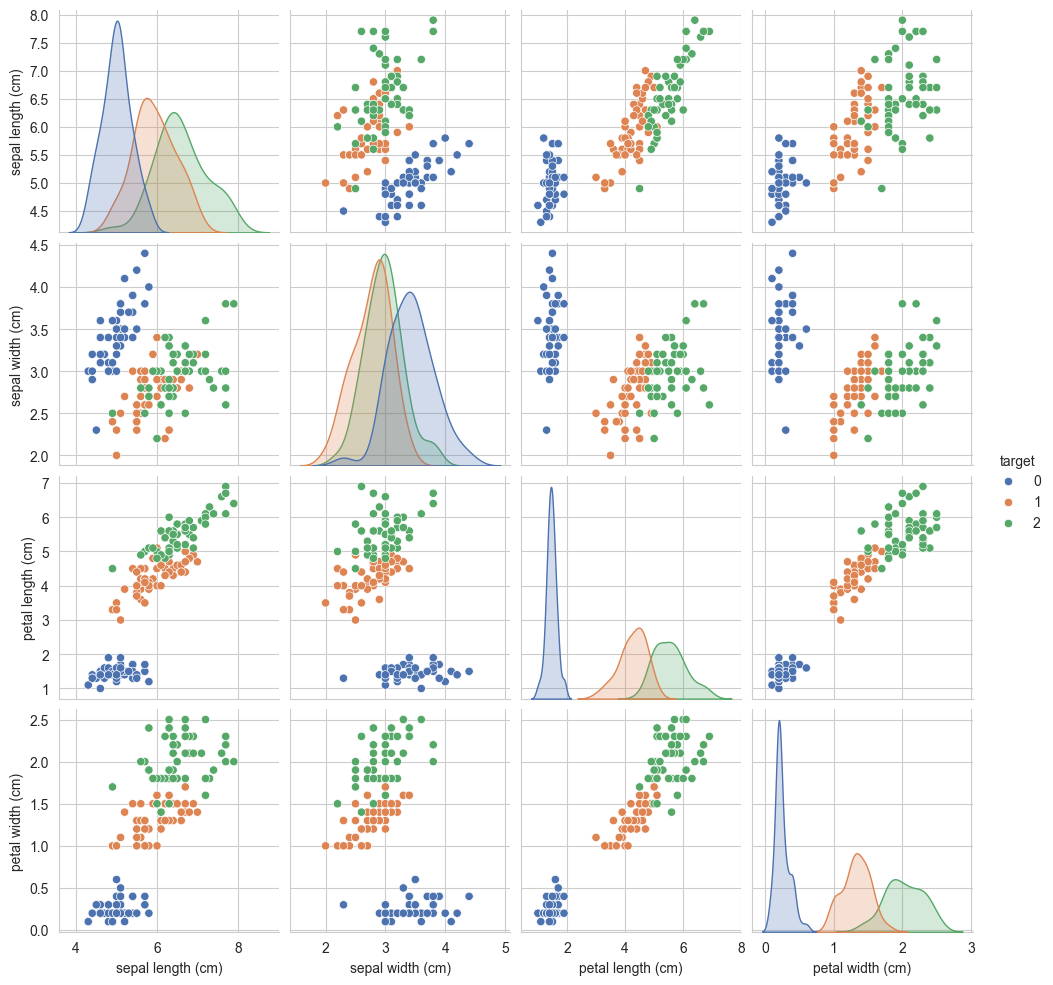

In [28]:
sns.pairplot(df, hue= 'target', palette='deep')
plt.show()

here, we can see in 4th column and 3rd row, iris can be distinguished better than others pairs\
so we will choose the `petal length (cm)` and `petal width (cm)` for classification tasks.

## Histogram, PDF, CDF